## Imports

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from joblib import dump, load  # Added import for joblib
import pandas as pd

## Loading file

In [2]:



file_path = "/Users/zac/Codes/Music_Project/GIT_HUB/Musis_Recommendation_Engine/exploration/Data_collection/final_filtered_mood_list.csv"
# Load dataset
dataset = pd.read_csv(file_path)

try:
    dataset = dataset.rename(columns={"MOOD":"mood"})
    dataset.drop(columns=["Unnamed: 0"], inplace=True)
except Exception as e:
    print("An error occurred:", e)

# Select relevant features
features = ['valence', 'popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']


An error occurred: "['Unnamed: 0'] not found in axis"


## Cleaning Data

In [3]:
dataset.columns

Index(['artist_name', 'track_name', 'duration_ms', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'mood'],
      dtype='object')

In [4]:
# Remove rows with missing values
dataset = dataset.dropna(subset=features+['mood'])

# # One-hot encode 'genre' column with a prefix
# dataset = pd.get_dummies(dataset, columns=['genre'], prefix='genre')


# Remove rows with missing values
dataset = dataset.dropna(subset=features+['mood'])
dataset = dataset.drop(columns=['artist_name','track_name'])

# Select features again after one-hot encoding
features = dataset.columns.tolist()
features.remove('mood')

In [5]:
dataset

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mood
0,229173,2001,42,0.721,0.790,1,-4.125,1,0.1240,0.18300,0.000000,0.1000,0.821,103.141,SCARED
1,290320,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,SCARED
2,307879,2002,79,0.577,0.749,5,-7.215,0,0.0279,0.59900,0.011500,0.1830,0.255,130.970,SAD
3,307879,2002,79,0.577,0.749,5,-7.215,0,0.0279,0.59900,0.011500,0.1830,0.255,130.970,SAD
4,185586,2003,81,0.496,0.863,9,-4.153,1,0.0381,0.00460,0.000000,0.6390,0.243,110.018,SAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,229173,2016,66,0.400,0.479,8,-7.989,0,0.0308,0.05290,0.000002,0.1150,0.213,166.159,SAD
1188,319560,2017,58,0.454,0.404,3,-10.260,1,0.0270,0.14600,0.819000,0.1410,0.313,94.113,SAD
1189,215111,2018,66,0.791,0.267,5,-11.997,1,0.0415,0.67400,0.534000,0.1020,0.544,165.990,SCARED
1190,213598,2019,69,0.675,0.414,5,-6.508,1,0.0569,0.10500,0.000000,0.1920,0.439,128.927,SAD


In [36]:
dataset_sample = dataset.sample(frac=1).reset_index(drop=True)

In [37]:
dataset_sample

,mood,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,SAD,219067,2019,67,0.718,0.1660,6,-15.820,0,0.0344,0.887000,0.021600,0.1310,0.237,97.947
1,SAD,482830,2023,14,0.339,0.3400,7,-12.049,1,0.0340,0.582000,0.002970,0.1160,0.198,83.495
2,SAD,322587,2016,65,0.536,0.7080,6,-7.882,1,0.7580,0.513000,0.000000,0.0951,0.090,78.330
3,SCARED,197733,2012,71,0.693,0.4670,4,-9.558,0,0.0430,0.049700,0.452000,0.1070,0.402,105.958
4,HAPPY,184371,2021,56,0.461,0.5000,1,-9.828,1,0.0614,0.002450,0.030000,0.1160,0.572,76.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,HAPPY,246533,2011,62,0.608,0.8480,1,-5.086,1,0.0326,0.000622,0.000004,0.4290,0.338,127.999
477,SAD,393707,2003,55,0.489,0.7670,4,-8.309,1,0.1380,0.645000,0.000482,0.1080,0.556,175.877
478,ANGRY,164000,2020,80,0.798,0.6200,8,-7.079,0,0.2320,0.414000,0.019200,0.1120,0.235,120.031
479,SAD,222468,2019,37,0.691,0.0682,5,-18.186,1,0.0645,0.951000,0.000000,0.0916,0.352,76.940


## Selecting model Parameters

In [12]:


# Split dataset into features and target
X = dataset[features]
y = dataset['mood']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLP Classifier (Neural Network)
classifier = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', random_state=42, max_iter=2000, batch_size=4, alpha=0.001 ,learning_rate="adaptive", learning_rate_init=1e-3, shuffle=True)

# Train classifier
classifier.fit(X_train_scaled, y_train)





MLPClassifier(alpha=0.001, batch_size=4, hidden_layer_sizes=(200,),
              learning_rate='adaptive', max_iter=2000, random_state=42)

In [16]:
# Save the trained model
dump(classifier, 'model_v2.joblib')

# Optionally, you can load the model later for inference
# loaded_model = load('model.joblib')

['model_v2.joblib']

## Hyperparameter Tuning

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.1; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.01; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200,), learning_rate_init=0.01; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200,), learning_rate_init=0.01; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer

/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001; total time=   4.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(300,), learning_rate_init=0.1; total time=   0.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(400,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(300,), learning_rate_init=0.1; total time=   0.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(400,), learning_rate_init=0.001; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(300,), learning_rate_init=0.1; total time=   0.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(400,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(400,), learning_rate_init=0.001; total time=   0.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(400,), learning_

/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(400,), learning_rate_init=0.01; total time=   0.2s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(400,), learning_rate_init=0.001; total time=   0.8s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(400,), learning_rate_init=0.01; total time=   0.4s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(400,), learning_rate_init=0.001; total time=   0.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001; total time=   0.4s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(400,), learning_rate_init=0.1; total time=   1.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001; total time=   0.8s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(400,), learning_rate_ini

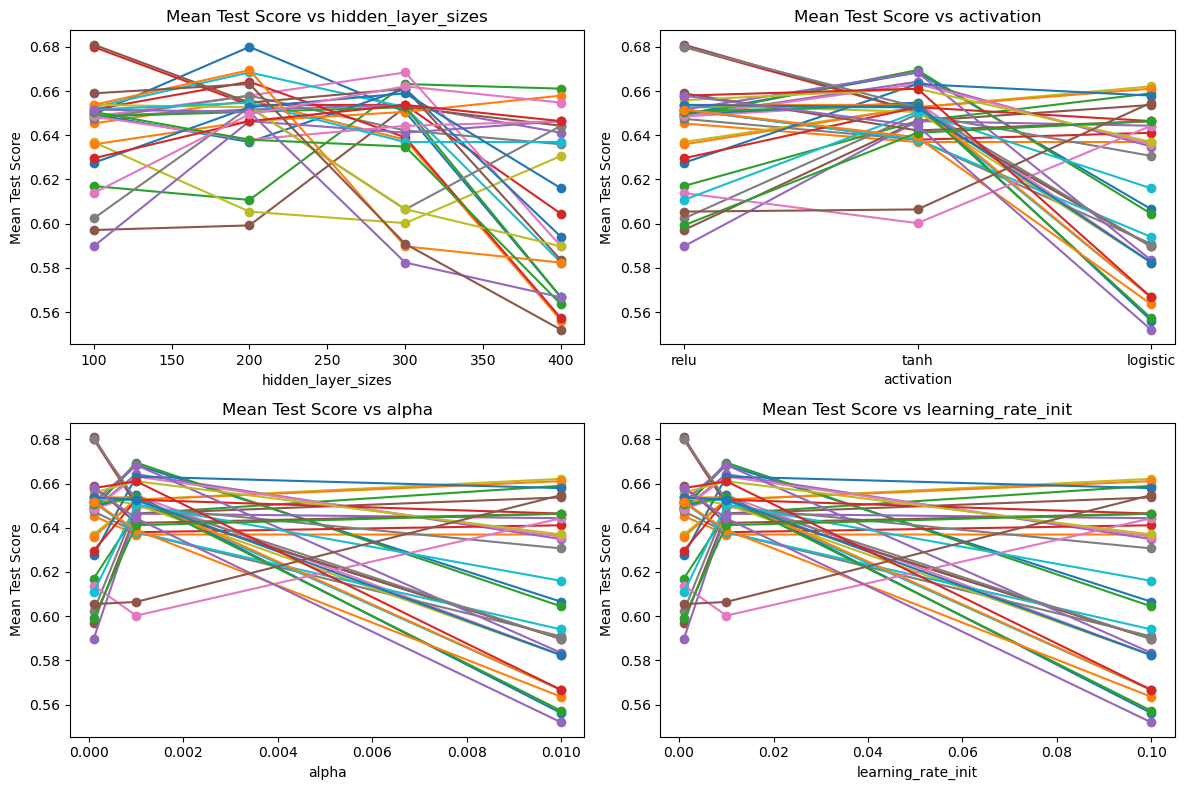

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (300,), (400,)],  # Different sizes of hidden layers
    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate_init': [0.00001,0.0001, 0.001, 0.01, 0.1],  # Initial learning rate
    'batch_size': [4, 8, 16]
}

# Initialize MLP Classifier
classifier = MLPClassifier(max_iter=2000, random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict on test set with best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Visual comparison of hyperparameters
results = grid_search.cv_results_
param_names = list(param_grid.keys())

plt.figure(figsize=(12, 8))
for i, param_name in enumerate(param_names):
    plt.subplot(2, 2, i + 1)
    param_values = param_grid[param_name]
    mean_scores = results[f"mean_test_score"].reshape(len(param_values), -1)
    plt.plot(param_values, mean_scores, '-o')
    plt.title(f"Mean Test Score vs {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Mean Test Score")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END alpha=0.001, batch_size=1, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=  10.2s
[CV] END alpha=0.001, batch_size=1, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=  10.4s
[CV] END alpha=0.001, batch_size=1, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=  10.4s
[CV] END alpha=0.001, batch_size=1, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  47.2s
[CV] END alpha=0.001, batch_size=1, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time= 1.1min
[CV] END alpha=0.001, batch_size=1, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time= 1.1min


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=2, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time= 1.4min
[CV] END alpha=0.001, batch_size=2, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  34.6s
[CV] END alpha=0.001, batch_size=2, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  37.6s


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=2, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time= 1.4min
[CV] END alpha=0.001, batch_size=2, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   6.0s
[CV] END alpha=0.001, batch_size=2, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   6.8s
[CV] END alpha=0.001, batch_size=2, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   5.7s


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=2, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time= 1.4min
[CV] END alpha=0.001, batch_size=2, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  41.3s


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=4, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time=  42.8s
[CV] END alpha=0.001, batch_size=4, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time=  42.6s


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=4, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time=  43.3s
[CV] END alpha=0.001, batch_size=4, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   4.2s
[CV] END alpha=0.001, batch_size=4, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   4.5s
[CV] END alpha=0.001, batch_size=4, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  27.3s
[CV] END alpha=0.001, batch_size=4, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   5.2s
[CV] END alpha=0.001, batch_size=4, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  26.1s


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=1, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time= 2.7min


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=1, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time= 2.8min


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=1, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time= 2.8min
[CV] END alpha=0.001, batch_size=8, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   3.1s
[CV] END alpha=0.001, batch_size=8, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   3.2s
[CV] END alpha=0.001, batch_size=8, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   2.9s
[CV] END alpha=0.001, batch_size=4, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  30.3s
[CV] END alpha=0.001, batch_size=8, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  19.9s
[CV] END alpha=0.001, batch_size=8, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  17.1s


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=8, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time=  23.5s


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=8, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time=  23.6s


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=8, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time=  23.9s
[CV] END alpha=0.001, batch_size=16, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   2.6s
[CV] END alpha=0.001, batch_size=8, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  22.3s
[CV] END alpha=0.001, batch_size=16, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   2.4s


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=16, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time=  13.3s
[CV] END alpha=0.001, batch_size=16, hidden_layer_sizes=(200,), learning_rate_init=0.001; total time=   2.5s


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=16, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time=  12.4s
[CV] END alpha=0.001, batch_size=16, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  12.1s
[CV] END alpha=0.001, batch_size=16, hidden_layer_sizes=(200,), learning_rate_init=1e-05; total time=  12.5s


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=16, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  12.6s
[CV] END alpha=0.001, batch_size=16, hidden_layer_sizes=(200,), learning_rate_init=0.0001; total time=  12.2s
Best Parameters: {'alpha': 0.001, 'batch_size': 4, 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.001}
Test Accuracy: 0.895397489539749


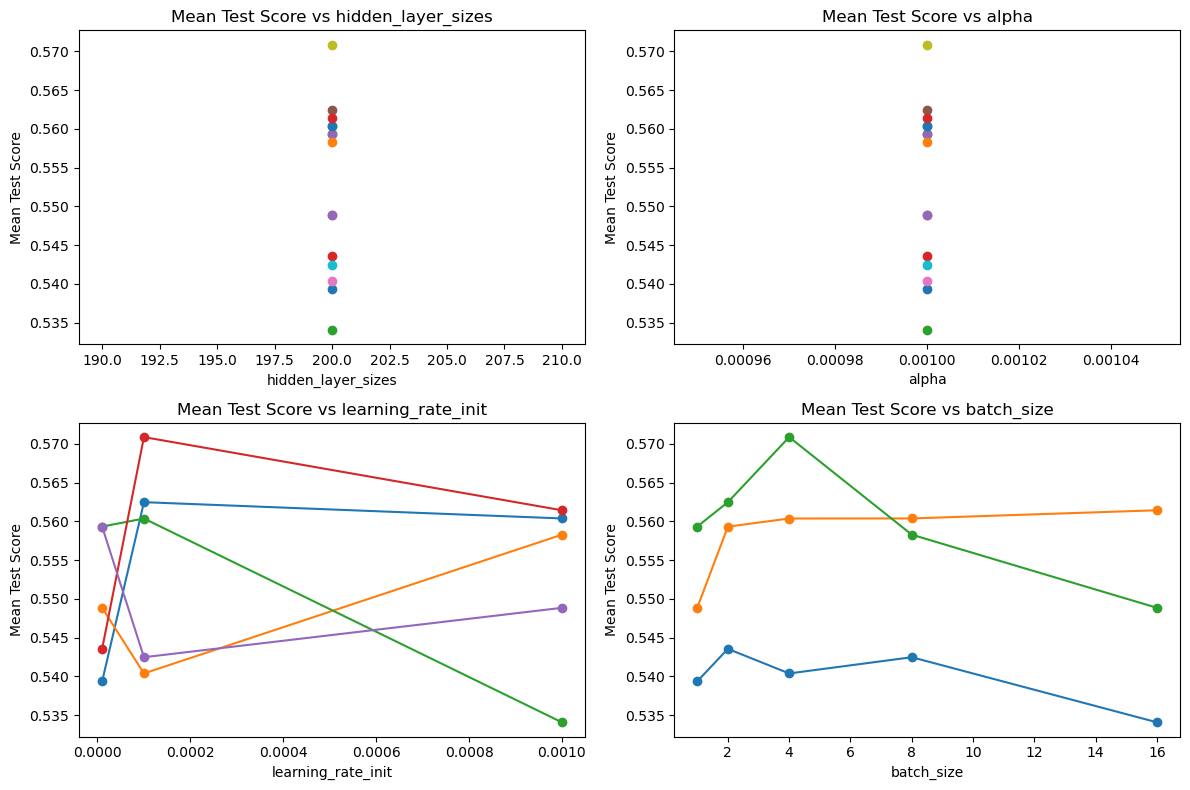

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(200,)],  # Different sizes of hidden layers
    'alpha': [0.001],  # L2 regularization parameter
    'learning_rate_init': [0.00001,0.0001, 0.001],  # Initial learning rate
    'batch_size': [1, 2, 4, 8, 16]
}

# Initialize MLP Classifier
classifier = MLPClassifier(max_iter=2000, random_state=42, activation="relu")

# Perform GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict on test set with best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Visual comparison of hyperparameters
results = grid_search.cv_results_
param_names = list(param_grid.keys())

plt.figure(figsize=(12, 8))
for i, param_name in enumerate(param_names):
    plt.subplot(2, 2, i + 1)
    param_values = param_grid[param_name]
    mean_scores = results[f"mean_test_score"].reshape(len(param_values), -1)
    plt.plot(param_values, mean_scores, '-o')
    plt.title(f"Mean Test Score vs {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Mean Test Score")
plt.tight_layout()
plt.show()


## Checking accuracy and other metrics

In [13]:

# Predict probabilities on test set
y_pred_proba = classifier.predict_proba(X_test_scaled)

# Print probabilities of each class
print("Probabilities of each class for the first few samples in the test set:")
print(y_pred_proba[:5])  # printing first 5 samples for illustration purposes

# Optionally, you can print the actual classes as well for comparison
y_pred = classifier.predict(X_test_scaled)
print("\nActual classes for comparison:")
print(y_pred[:5])  # printing first 5 samples for illustration purposes

# Evaluate classifier (optional)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Probabilities of each class for the first few samples in the test set:
[[8.67983935e-04 1.24237260e-05 1.08228945e-04 9.99011363e-01]
 [9.98356656e-01 5.33254930e-04 2.88458051e-05 1.08124315e-03]
 [9.21561580e-01 4.10284264e-02 2.10768963e-03 3.53023037e-02]
 [6.84963430e-07 1.43293431e-08 9.98415075e-01 1.58422550e-03]
 [2.34740733e-23 7.22490336e-17 2.11387246e-06 9.99997886e-01]]

Actual classes for comparison:
['SCARED' 'ANGRY' 'ANGRY' 'SAD' 'SCARED']

Classification Report:
              precision    recall  f1-score   support

       ANGRY       1.00      0.86      0.93        29
       HAPPY       0.70      0.93      0.80        28
         SAD       0.92      0.95      0.94       129
      SCARED       0.91      0.75      0.82        53

    accuracy                           0.90       239
   macro avg       0.88      0.87      0.87       239
weighted avg       0.90      0.90      0.90       239



In [14]:
print(y_pred[:10], "\n", y_test[:10])

['SCARED' 'ANGRY' 'ANGRY' 'SAD' 'SCARED' 'ANGRY' 'SCARED' 'ANGRY' 'SAD'
 'SAD'] 
 953    SCARED
954     ANGRY
955     ANGRY
956       SAD
957    SCARED
958     ANGRY
959    SCARED
960     ANGRY
961       SAD
962       SAD
Name: mood, dtype: object


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from joblib import dump, load  # Added import for joblib

# Load dataset
dataset = pd.read_csv("/Users/zac/Codes/Music_Project/GIT_HUB/Musis_Recommendation_Engine/data/testing/testing.csv")

# Select relevant features
features = ['valence', 'popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature']

# Remove rows with missing values
dataset = dataset.dropna(subset=features+['mood'])

# One-hot encode 'genre' column with a prefix
dataset = pd.get_dummies(dataset, columns=['genre'], prefix='genre')

# Remove rows with missing values
dataset = dataset.dropna(subset=features+['mood'])
dataset = dataset.drop(columns=['artist_name','track_name','track_id'])

# Select features again after one-hot encoding
features = dataset.columns.tolist()
features.remove('mood')

# Split dataset into features and target
X = dataset[features]
y = dataset['mood']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:

# Initialize MLP Classifier (Neural Network)
classifier = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', solver='adam',max_iter=20 , random_state=42)

# Train classifier
classifier.fit(X_train, y_train)

# Save the trained model
dump(classifier, 'model.joblib')

# Optionally, you can load the model later for inference
# loaded_model = load('model.joblib')

# Predict on test set
y_pred = classifier.predict(X_test)

# Evaluate classifier
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00         6
       Happy       0.23      1.00      0.37         5
         Sad       0.00      0.00      0.00         3
      Scared       0.00      0.00      0.00         8

    accuracy                           0.23        22
   macro avg       0.06      0.25      0.09        22
weighted avg       0.05      0.23      0.08        22



/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [17]:
print(y_pred)

['Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy'
 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy'
 'Happy' 'Happy' 'Happy' 'Happy']


In [20]:
# Predict probabilities on test set
y_pred_proba = classifier.predict_proba(X_test_scaled)

# Print probabilities of each class
print("Probabilities of each class for the first few samples in the test set:")
print(y_pred_proba[:5])  # printing first 5 samples for illustration purposes

# Optionally, you can print the actual classes as well for comparison
y_pred = classifier.predict(X_test_scaled)
print("\nActual classes for comparison:")
print(y_pred[:5])  # printing first 5 samples for illustration purposes

# # Evaluate classifier (optional)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

Probabilities of each class for the first few samples in the test set:
[[0.24216252 0.23561062 0.25799503 0.26423182]
 [0.18750752 0.27860416 0.17565757 0.35823075]
 [0.12603631 0.32724933 0.25366087 0.29305349]
 [0.15777178 0.32646337 0.18551635 0.3302485 ]
 [0.17885239 0.26088643 0.30534394 0.25491724]]

Actual classes for comparison:
['Scared' 'Scared' 'Happy' 'Scared' 'Sad']


/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/zac/anaconda3/envs/model_music/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
